# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 1</span>

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import math
from scipy.stats import chi2
from scipy.stats import kstest
from scipy.optimize import curve_fit
from scipy.stats import norm

colors = sns.color_palette("hls", 8)   # Colors
title_size = 16                        # Size title
axis_size = 14                         # Size axis label
value_size = 12                        # Size values on axis
legend_size = 12                       # Size legend


## Exercise 01.1
### Assignment
Test the Pseudo-Random Number generator downloaded from the NSL Ariel web site by estimating:

1. $\langle r \rangle = \int_0^1 r dr = 1/2$. Make a picture of the estimation of $\langle r \rangle$ and its uncertainty (which corresponds to Standard Deviation of the mean for the estimation of $\langle r \rangle$) with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$.

2. $\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$. Make a picture of the estimation of $\sigma^2$ and its uncertainty (which corresponds to Standard Deviation of the mean for the estimation of $\langle (r-1/2)^2 \rangle$) with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$.

3. Divide $[0,1]$ into $M$ identical sub-intervals and implement the $\chi^2$ test. Obviously, the number of expected events observed in each sub-interval after $n$ *throws*, according to a uniform distribution, is $np = n\times 1/M= n/M$. Fix $M=10^2$ and use for $n$ the first $10^4$ pseudo-random numbers, then the successive $10^4$ pseudo-random numbers, and so on ... 100 times. Plot $\chi^2_j$ for $j=1, ..., 100$. In this case the chi-square statistic is:
$$\chi^2 = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M}$$
We should expect on average that $(n_i - n/M)^2 \simeq n/M$ and thus $\chi^2 \simeq 100$, i.e. the number of sub-intervals.
A larger value of $\chi^2$ indicates that the hypothesis ($n_i$ are drawn from a uniform distribution) is rather unlikely ... but before judging, you could compare the histogram of the values obtained for $\chi^2_j$ with the true probability distribution.

### Exercise 01.1.1, 01.1.2 - Resolution

All numbers produced by the pseudo-random number generator come from a uniform distribution on the interval $[0, \ 1]$. To assess the quality of the pseudo-random numbers and prevent correlations, it's necessary to verify that the mean and variance are consistent with the probability distribution from which the numbers are drawn $\left( \langle r \rangle = 1/2, \ \sigma^2_r = 1/12 \right)$. 

To accomplish this, I employed data blocking using two `for` loop. I generated $M = 10^{7}$ pseudo-random numbers and divided them into $N = 100$ blocks ($L=\frac{M}{N} = 10^5$ numbers in each block). I calculated the mean and variance of the numbers in each block within the innermost loop and then estimated the statistical properties of the entire dataset by averaging the values obtained from each block within the outer loop. To estimate the statistical uncertanty of the cosidered quantities I calculated the standard deviation of the mean using:

$$\sigma = \sqrt{\frac{1}{N-1} \left( \langle x^2\rangle -\langle x \rangle^2 \right)} $$

where $x = r$ or $x = \sigma^2_r$. Since the formula is not applicable when using only one block, the uncertainty in this case is null.

The mean and variance of the pseudo-random numbers are compatible with the expected values.

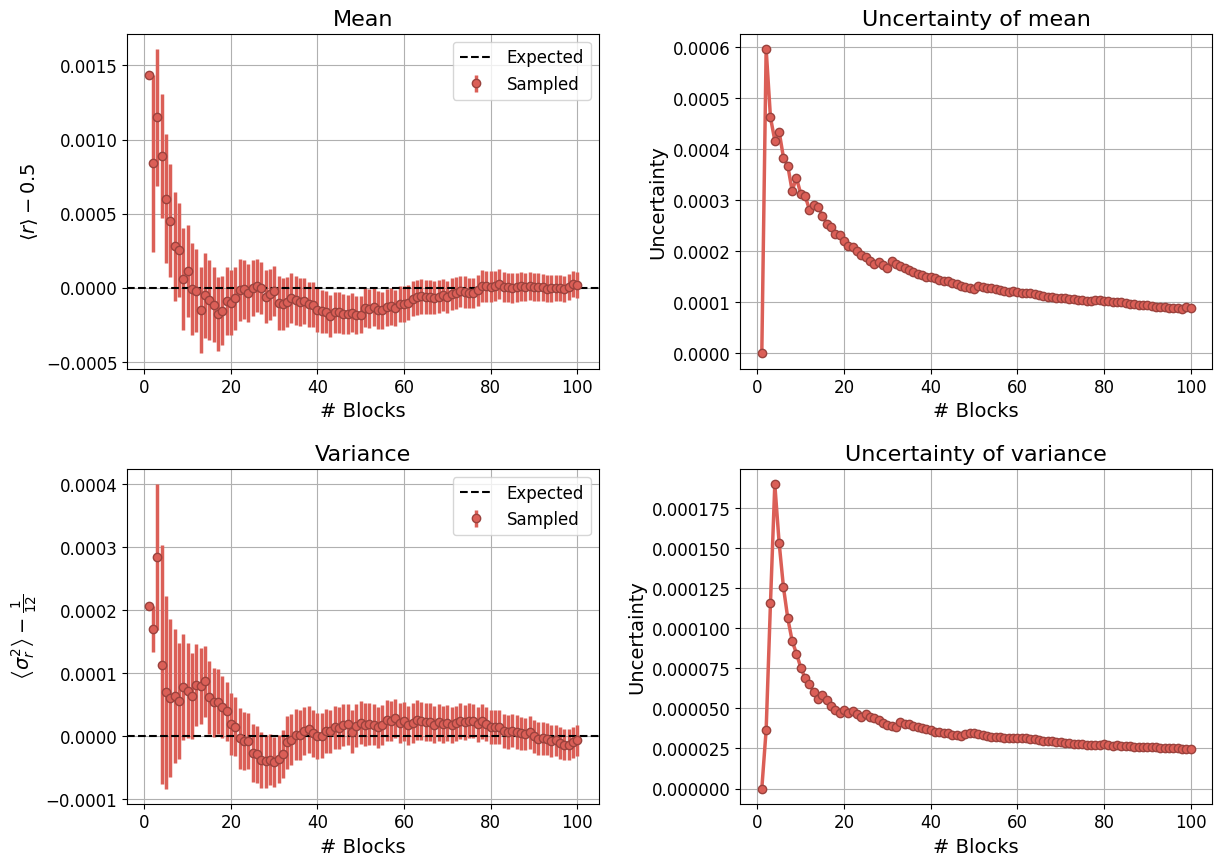

In [5]:
# Data import
df = pd.read_csv('../E01/e01_1/data.dat', delimiter=' ') 

plt.figure(figsize=(14, 10))

# Subplot mean
plt.subplot(2, 2, 1)
plt.errorbar(df['#blocchi'], df['media'] - 0.5, yerr=df['err'], color=colors[0], linewidth=2.5, fmt='o', mec=tuple(np.array(colors[0]) * 0.7), label="Sampled")
plt.axhline(0, color='black', linestyle='--', label="Expected")      # Line at y = 0
plt.title("Mean", fontsize=title_size)
plt.xlabel(r'# Blocks', fontsize=axis_size)
plt.ylabel(r'$\left< r \right>-0.5$', fontsize=axis_size)
plt.tick_params(axis='both', which='major', labelsize=value_size)
plt.legend(fontsize=legend_size)
plt.grid(True)

# Subplot uncertanty of mean
plt.subplot(2, 2, 2)
plt.plot(df['#blocchi'], df['err'], color=colors[0], linewidth=2.5, marker = "o", mec=tuple(np.array(colors[0]) * 0.7))
plt.title("Uncertainty of mean", fontsize=title_size)
plt.xlabel('# Blocks', fontsize=axis_size)
plt.ylabel('Uncertainty', fontsize=axis_size)
plt.tick_params(axis='both', which='major', labelsize=value_size)
plt.grid(True)

# Subplot variance
plt.subplot(2, 2, 3)
plt.errorbar(df['#blocchi'], df['var'] -  1. / 12, yerr=df['var_err'], color=colors[0], linewidth=2.5, fmt='o', mec=tuple(np.array(colors[0]) * 0.7), label="Sampled")
plt.axhline(0, color='black', linestyle='--', label="Expected")      # Line at y = 0
plt.title("Variance", fontsize=title_size)
plt.xlabel(r'# Blocks', fontsize=axis_size)
plt.ylabel(r'$\left< \sigma_r^2 \right>-\frac{1}{12}$', fontsize=axis_size)
plt.tick_params(axis='both', which='major', labelsize=value_size)
plt.legend(fontsize=legend_size)
plt.grid(True)

# Subplot uncertanty of mean
plt.subplot(2, 2, 4)
plt.plot(df['#blocchi'], df['var_err'], color=colors[0], linewidth=2.5, marker = "o", mec=tuple(np.array(colors[0]) * 0.7))
plt.title("Uncertainty of variance", fontsize=title_size)
plt.xlabel('# Blocks', fontsize=axis_size)
plt.ylabel('Uncertainty', fontsize=axis_size)
plt.tick_params(axis='both', which='major', labelsize=value_size)
plt.grid(True)

# Show plots
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

### Exercise 01.1.3 - Resolution

To perform a chi-square test, I divided the interval $[0,1]$ into $M = 100$ sub-intervals and generated $N = 10^4$ pseudo-random numbers between $[0, 1)$. For each number, I determined the sub-interval in which it falls using 

```cpp
floor(rnd.Rannyu() * M)
```

and calculated the corresponding $\chi^2$ value using the provided formula. I repeated this process $R=100$ times and created a histogram of the $\chi^2$ values, fitting it with the true probability distribution of $\chi^2$.

In order to make sure that the $\chi^2$ values are compatible with the true distribution (100 values are too few), I did the same opearation with $R=10^4$ values of $\chi^2$, obtaining that the $\chi^2$ values follow the true distribuction, settling around the value 100. The p-value obtained from Kolmogorov-Smirnov test is $p_{value} \approx 0.898$, indicating that the distribution of the data is very close to the expected distribution.

Mean = 99.10, Std. dev. = 14.04
P-value: 0.8981387410020293


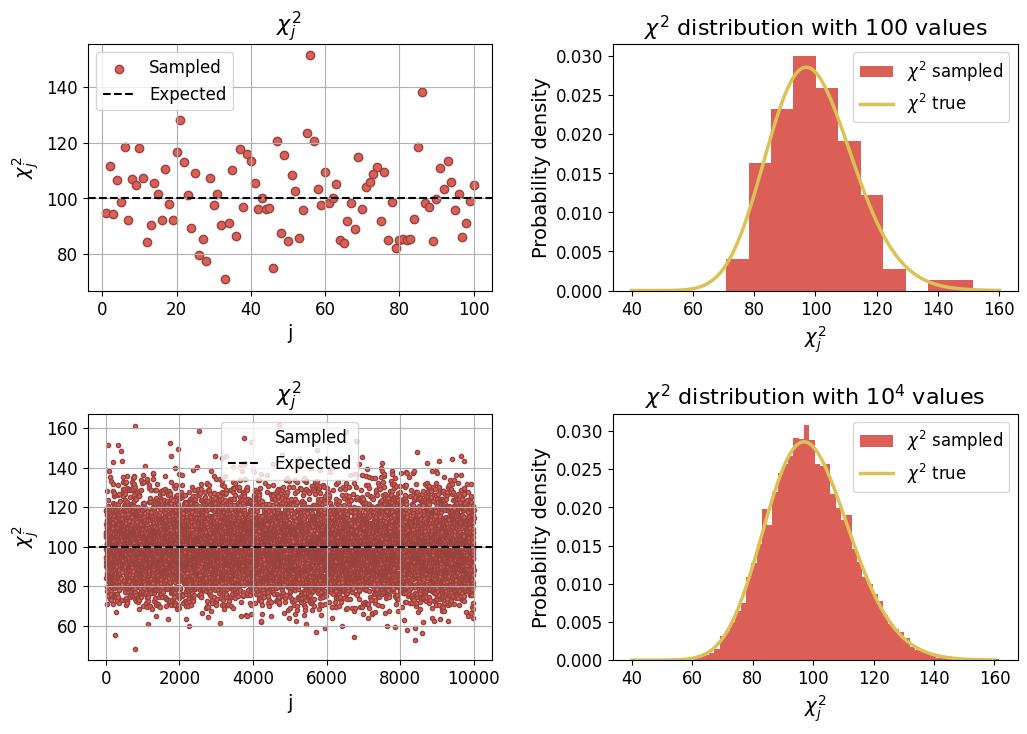

In [17]:
# Import data chi^2
df = pd.read_csv("../E01/e01_1/data2.dat", delimiter=' ')

print("Mean = {0:.2f}, Std. dev. = {1:.2f}".format(df['chi_2'].mean(), df['chi_2'].std()))  # Print mean and standard deviation of chi^2    

plt.figure(figsize=(12, 8))

### 100 chi square

# Plot chi^2 
plt.subplot(2, 2, 1)
plt.scatter(df['#ripetizione'][:100], df['chi_2'][:100], marker='o', color=colors[0], edgecolors=tuple(np.array(colors[0]) * 0.7), label="Sampled")
plt.axhline(100, color='black', linestyle='--', label="Expected")      # Line at y = 100
plt.title(r"$\chi_j^2$ ", fontsize=title_size)
plt.xlabel(r'j', fontsize=axis_size)
plt.ylabel(r'$\chi_j^2$', fontsize=axis_size)
plt.tick_params(axis='both', which='major', labelsize=value_size)
plt.legend(fontsize=legend_size)
plt.grid(True)

# Histogram chi^2
plt.subplot(2, 2, 2)
plt.hist(df['chi_2'][:100], bins='auto', density=True, color=colors[0], label=r"$\chi^2$ sampled")
plt.title(r"$\chi^2$ distribution with 100 values", fontsize=title_size)
plt.xlabel(r'$\chi_j^2$', fontsize=axis_size)
plt.ylabel('Probability density', fontsize=axis_size)
plt.tick_params(axis='both', which='major', labelsize=value_size)

# Plot true probability distribution
x = np.linspace(40, 160, 100)
pdf = chi2.pdf(x, 99)      # Chi-squared PDF with 99 degrees of freedom
plt.plot(x, pdf, label=r'$\chi^2$ true', color=colors[1], linewidth=2.5)
plt.legend(fontsize=legend_size)

### 10000 chi square

# Plot chi^2
plt.subplot(2, 2, 3)
plt.scatter(df['#ripetizione'], df['chi_2'], marker='.', color=colors[0], edgecolors=tuple(np.array(colors[0]) * 0.7), label="Sampled")
plt.axhline(100, color='black', linestyle='--', label="Expected")      # Line at y = 100
plt.title(r"$\chi_j^2$ ", fontsize=title_size)
plt.xlabel(r'j', fontsize=axis_size)
plt.ylabel(r'$\chi_j^2$', fontsize=axis_size)
plt.tick_params(axis='both', which='major', labelsize=value_size)
plt.legend(fontsize=legend_size)
plt.grid(True)

# Histogram chi^2
plt.subplot(2, 2, 4)
plt.hist(df['chi_2'], bins='auto', density=True, color=colors[0], label=r"$\chi^2$ sampled")
plt.title(r"$\chi^2$ distribution with $10^4$ values", fontsize=title_size)
plt.xlabel(r'$\chi_j^2$', fontsize=axis_size)
plt.ylabel('Probability density', fontsize=axis_size)
plt.tick_params(axis='both', which='major', labelsize=value_size)

# Plot true probability distribution
x = np.linspace(40, 160, 100)
pdf = chi2.pdf(x, 99)      # Chi-squared PDF with 99 degrees of freedom
plt.plot(x, pdf, label=r'$\chi^2$ true', color=colors[1], linewidth=2.5)
plt.legend(fontsize=legend_size)
statistic, p_value = kstest(df['chi_2'], chi2(df=99).cdf)
print("P-value:", p_value)

# Show plots
plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.show()


## Exercise 01.2
### Assignment
Extend Pseudo-Random Number generator downloaded from the NSL Ariel web site and check the Central Limit Theorem:

1. Add two probability distributions by using the **method of the inversion of the cumulative distribution** to sample from a **generic** exponential distribution, $p(x) = \lambda \exp(-\lambda x)$, $x\in [0;+\infty]$, and a **generic** Cauchy-Lorentz distribution $p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$, $x\in [-\infty;+\infty]$.
2. Make 3 pictures with the histograms obtained filling them with $10^4$ realizations of $S_N = \frac{1}{N}\sum_{i=1}^N x_i$ (for $N=1, 2, 10, 100$), being $x_i$ a random variable sampled throwing a *standard* dice (fig.1), an *exponential* dice (fig.2, use $\lambda=1$) and a *Lorentzian* dice (fig.3, use $\mu=0$ and $\Gamma=1$).

Note tha you can try to fit the case $N=100$ with a Gaussian for standard and exponential dices, whereas you should use a Cauchy-Lorentz distribution for the last case.

### Exercise 01.2.1 - Resolution

The inverse transform method of the cumulative distribution function is a technique for sampling nontrivial probability distributions $p(x)$ from a set of numbers generated stochastically with a uniform distribution between $y \in [0,1)$ using the formula:

$$x = F^{-1}(y)$$

where $F(x) = \int_{-\infty}^x  p(t) \ dt$ is the cumulative distribution function of the distribution $p(x)$.

**Exponential distribution**

For an exponenetial distribution $p(x) = \lambda e^{-\lambda x}$ with $x\in [0, +\infty)$, the comulative function is:

$$F(x) = \int_{-\infty}^x  \lambda e^{-\lambda t} \ dt = 1 - e^{-\lambda x} = y$$

with $y \in [0,1)$. The inverse function is:

$$x = -\frac{1}{\lambda} \log{\left(1-y\right)}$$

**Cauchy - Lorentz distribution**

For an Cauchy - Lorentz distribution $p(x) = \frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$ with $x\in [-\infty;+\infty]$, the comulative function is:

$$F(x) = \int_{-\infty}^x  \frac{1}{\pi}\frac{\Gamma}{(t-\mu)^2+\Gamma^2} \ dt = \frac{1}{\pi} \arctan{\left(\frac{x-\mu}{\Gamma} \right)} + \frac{1}{2}= y$$

with $y \in [0,1)$. The inverse function is:

$$x = \mu + \Gamma \tan{\left[\pi \left(y - \frac{1}{2} \right)\right]}$$

### Exercise 01.2.2 - Resolution

For each type of distribution, I calculate $S_N$ $M=10^4$ times for different values of $N=1, 2, 10, 100$.

For numbers generated from uniform and exponential distributions (distributions with finite variance), increasing the value of $N$ causes $S_N$ to converge to a Gaussian distribution according to the Central Limit Theorem. This theorem states that the sum of a large number of independent random variables with the same distribution and finite variance tends to be distributed as a Gaussian distribution. Indeed, for $N = 100$, the distributions of $S_N$ fit a Gaussian distribution.

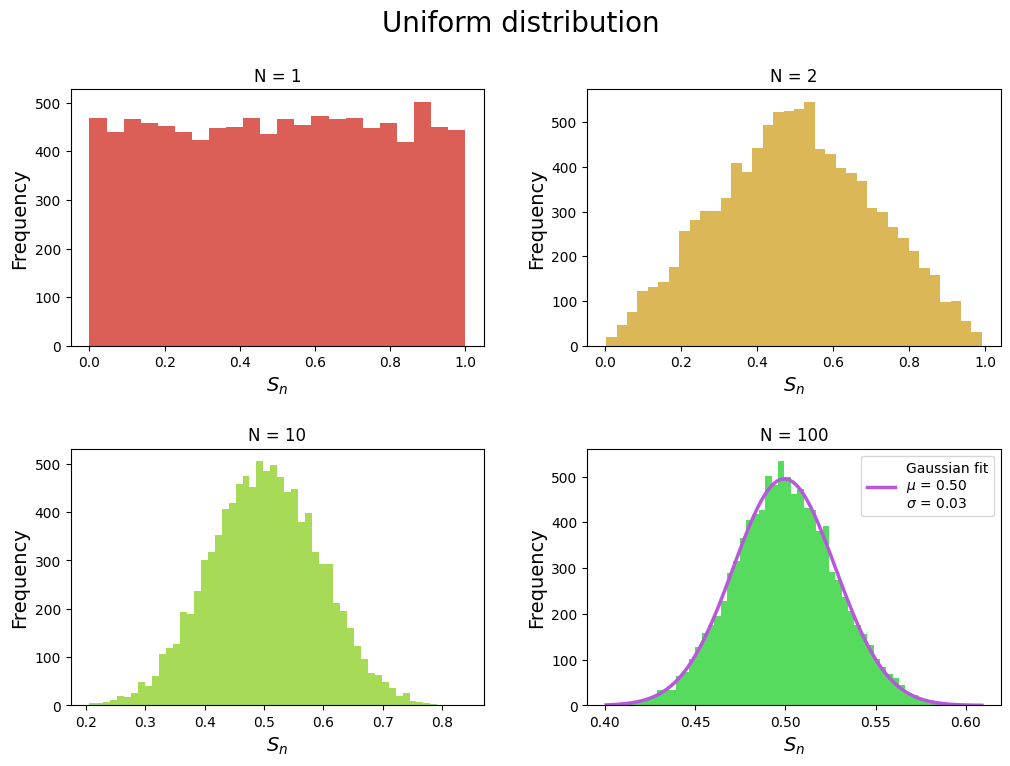

In [21]:
### Uniform distribution
# Read data and fix
df = pd.read_csv('../E01/e01_2/data_unif.dat', delimiter=' ', header=None) 
df = df.set_index(0)
df = df.transpose()

# Gaussian fuction
def gaussian(x, A, mu, sigma):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2))

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Uniform distribution', fontsize=title_size + 4)

# Fill histogram
for i, column in enumerate(df.columns):
    col_index = i // 2, i % 2    # Index for subplots
    axs[col_index].hist(df[column], bins='auto', color=colors[i])
    axs[col_index].set_xlabel(r'$S_n$', fontsize=axis_size)
    axs[col_index].set_ylabel('Frequency', fontsize=axis_size)
    axs[col_index].set_title('N = ' + str(df.columns[i]))
    axs[col_index].tick_params(axis='both', which='major', labelsize=value_size)

    # Fit Gaussian distribution
    if i == 3:
        
        hist, bin_edges = np.histogram(df[column], bins='auto')
        bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2     # Bin center
        initial_guess = [max(hist), np.mean(df[column]), np.std(df[column])]  # Initial guess for parameters: amplitude, mean, and standard deviation
        params, covariance = curve_fit(gaussian, bin_centers, hist, p0=initial_guess)   # Gaussian fit
        A_fit, mu_fit, sigma_fit = params         # Fitted parameters
        
        # Plot fitted Gaussian distribution
        x = np.linspace(df[column].min(), df[column].max(), 100)
        axs[col_index].plot(x, gaussian(x, A_fit, mu_fit, sigma_fit), color=colors[7], linewidth=2.5, label=f'Gaussian fit\n$\mu$ = {mu_fit:.2f}\n$\sigma$ = {sigma_fit:.2f}')
        axs[col_index].legend(fontsize=legend_size)

plt.subplots_adjust(wspace=0.25, hspace=0.4)
plt.show()

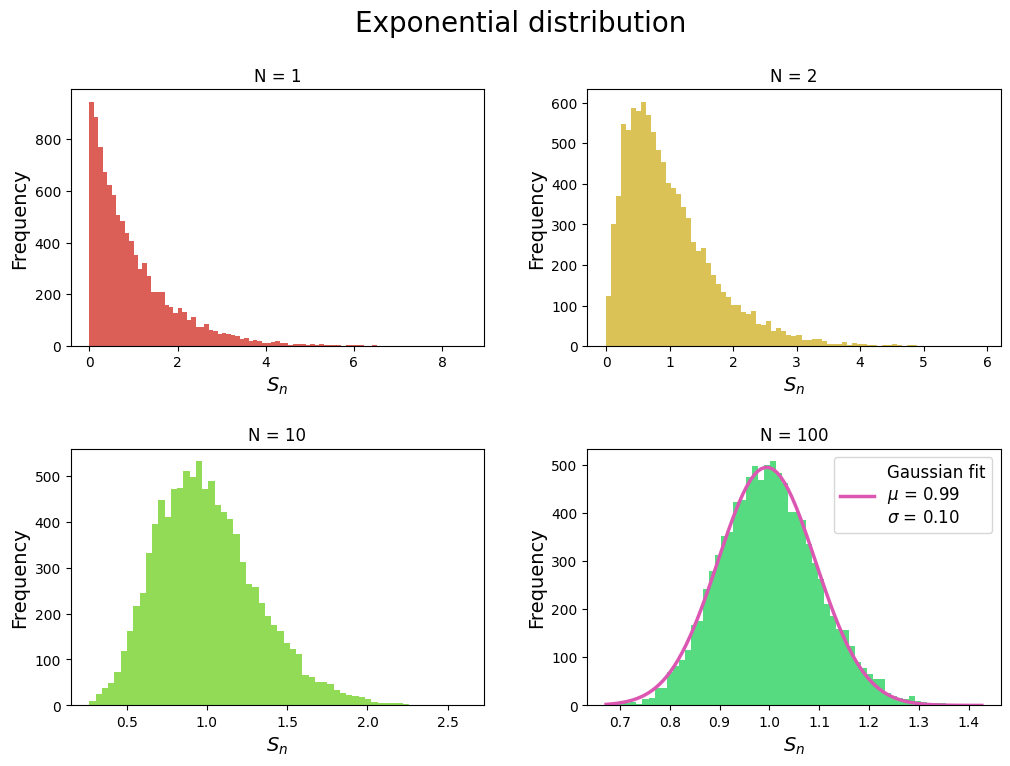

In [24]:
### Exponantial distribution
# Read data and fix
df = pd.read_csv('../E01/e01_2/data_exp.dat', delimiter=' ', header=None) 
df = df.set_index(0)
df = df.transpose()

# Gaussian fuction
def gaussian(x, A, mu, sigma):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2))

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Exponential distribution', fontsize=title_size + 4)

# Fill histogram 
for i, column in enumerate(df.columns):
    col_index = i // 2, i % 2
    axs[col_index].hist(df[column], bins='auto', color=colors[i])
    axs[col_index].set_xlabel(r'$S_n$', fontsize=axis_size)
    axs[col_index].set_ylabel('Frequency', fontsize=axis_size)
    axs[col_index].set_title('N = ' + str(df.columns[i]))
    axs[col_index].tick_params(axis='both', which='major', labelsize=value_size)

    # Fit Gaussian distribution
    if i == 3:
        
        hist, bin_edges = np.histogram(df[column], bins='auto')
        bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2     # Bin center
        initial_guess = [max(hist), np.mean(df[column]), np.std(df[column])]  # Initial guess for parameters: amplitude, mean, and standard deviation
        params, covariance = curve_fit(gaussian, bin_centers, hist, p0=initial_guess)   # Gaussian fit
        A_fit, mu_fit, sigma_fit = params         # Fitted parameters
        
        # Plot fitted Gaussian distribution
        x = np.linspace(df[column].min(), df[column].max(), 100)
        axs[col_index].plot(x, gaussian(x, A_fit, mu_fit, sigma_fit), color=colors[7], linewidth=2.5, label=f'Gaussian fit\n$\mu$ = {mu_fit:.2f}\n$\sigma$ = {sigma_fit:.2f}')
        axs[col_index].legend(fontsize=legend_size)

plt.subplots_adjust(wspace=0.25, hspace=0.4)
plt.show()

For numbers generated from a Cauchy-Lorentz distribution (distribution with infinite variance), the Central Limit Theorem does not hold, and $S_N$ does not converge to a Gaussian distribution, how is possible to see in the plot. Instead, for $N = 100$, the distribution of $S_N$ fits with a Cauchy-Lorentz distribution because it is a stable distribution.

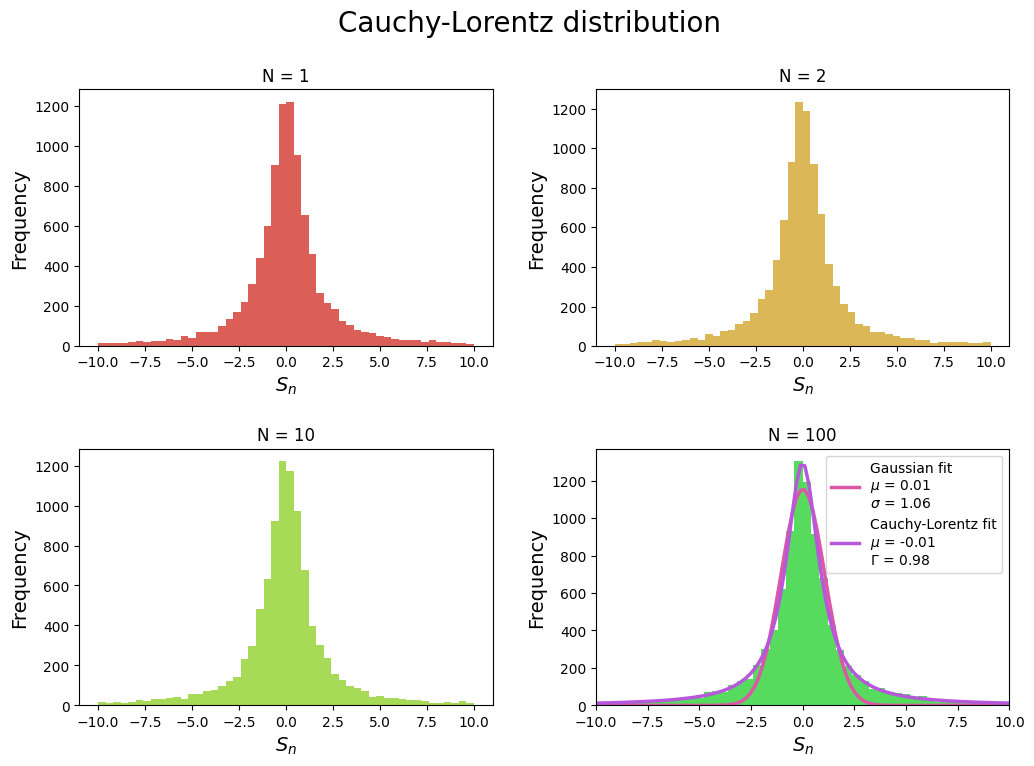

In [32]:
### Cauchy_lorentz distribution
# Read data and fix
df = pd.read_csv('../E01/e01_2/data_CL.dat', delimiter=' ', header=None) 
df = df.set_index(0)
df = df.transpose()

# Gaussian fuction
def gaussian(x, A, mu, sigma):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2))

# Cauchy-Lorentz fuction
def C_L(x, A, mu, gamma):
    return A / np.pi * gamma / ((x - mu)**2 + gamma**2)

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Cauchy-Lorentz distribution', fontsize=title_size + 4)

# Fill histogram with each coloum with different color
for i, column in enumerate(df.columns):
    col_index = i // 2, i % 2
    axs[col_index].hist(df[column], bins=50, range=(-10,10), color=colors[i])
    axs[col_index].set_xlabel(r'$S_n$', fontsize=axis_size)
    axs[col_index].set_ylabel('Frequency', fontsize=axis_size)
    axs[col_index].set_title('N = ' + str(df.columns[i]))
    axs[col_index].tick_params(axis='both', which='major', labelsize=value_size)

    # Fit Cauchy-Lorentz distribution
    if i == 3:

        hist, bin_edges = np.histogram(df[column], bins=50, range=(-10,10))
        bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2        # Bin center

        #Gaussian distribution
        initial_guess = [max(hist), np.mean(df[column]), 1.]  # Initial guess for parameters: amplitude, mean, and standard deviation
        params, covariance = curve_fit(gaussian, bin_centers, hist, p0=initial_guess)   # Gaussian fit
        A_fit, mu_fit, sigma_fit = params         # Fitted parameters

        x = np.linspace(-10, 10, 100)

        # Plot fitted Gaussian distribution
        axs[col_index].plot(x, gaussian(x, A_fit, mu_fit, sigma_fit), color=colors[8], linewidth=2.5, label=f'Gaussian fit\n$\mu$ = {mu_fit:.2f}\n$\sigma$ = {sigma_fit:.2f}')
        axs[col_index].legend(fontsize=legend_size)
        
        ## Cauchy-Lorentz distribution 
        initial_guess = [hist.max(), 0., 1.]                      # Initial guess for parameters: amplitude, mean, and standard deviation
        params, covariance = curve_fit(C_L, bin_centers, hist, p0=initial_guess)  # Cauchy-Lorentz fit
        A_fit, mu_fit, gamma_fit = params    # Fitted parameters

        # Plot fitted Cauchy-Lorentz distribution   
        axs[col_index].plot(x, C_L(x, A_fit, mu_fit, gamma_fit), color=colors[7], linewidth=2.5, label=f'Cauchy-Lorentz fit\n$\mu$ = {mu_fit:.2f}\n$\Gamma$ = {gamma_fit:.2f}')
        axs[col_index].legend(fontsize=legend_size)
        axs[col_index].set_xlim(-10, 10)

plt.subplots_adjust(wspace=0.25, hspace=0.4)
plt.show()

## Exercise 01.3 
### Assignment
**Simulate** the Buffon’s experiment (see LSN_Lecture_00, supplementary material):  A needle of length $L$ is thrown at random onto a horizontal plane ruled with straight lines a distance $d$ (must be $d > L$, but do not use $d\gg L$ otherwise $P\ll 1$) apart. The probability $P$ that the needle will intersect one of these lines is: $P = 2L/\pi d$. This could be used to evaluate $\pi$ from throws of the needle: if the needle is thrown down $N_{thr}$ times and is observed to land on a line $N_{hit}$ of those times, we can make an estimate of $\pi$ from
$$\pi = \frac{2L}{Pd} = \lim_{N_{thr} \to \infty}\frac{2LN_{thr}}{N_{hit}d}$$
Make a picture of the estimation of $\pi$ and its uncertainty (Standard Deviation of the mean) with a large number of *throws* $M$ as a function of the number of blocks, $N$. If possible, do not use $\pi$ to evaluate $\pi$.

### Resolution

To simulate Buffon’s experiment, I took a needle $L = 1$ unit long and lines $d=1.5$ units apart. I used data blocking with $N=100$ blocks and a total of $M=10^7$ throws. I generated a number uniformly distributed in $[0,d)$ that indicates the position $c$ of the needle's center. To generate an angle uniformly distributed in $[0, \frac{\pi}{2}]$ for the needle's inclination without using $\pi$, I generated two numbers ($x$ and $y$) uniformly distributed in $[0,1)$ and accepted points where $\sqrt{x^2 + y^2} <1$ (otherwise the distribution would have been peaked at $\frac{\pi}{4}$). To calculate the projection of the needle onto the line perpendicular to the lines, I used the formula $L_x = \frac{L}{2} \cos(\theta) = \frac{L}{2} \frac{y}{\sqrt{x^2 + y^2}}$. I incremented $N_{hit}$ if the needle would cross the lines, satisfying $c - L_x \leq 0$ or $c + L_x \geq d$.

The final value od $\pi$ is compatible with the true one.

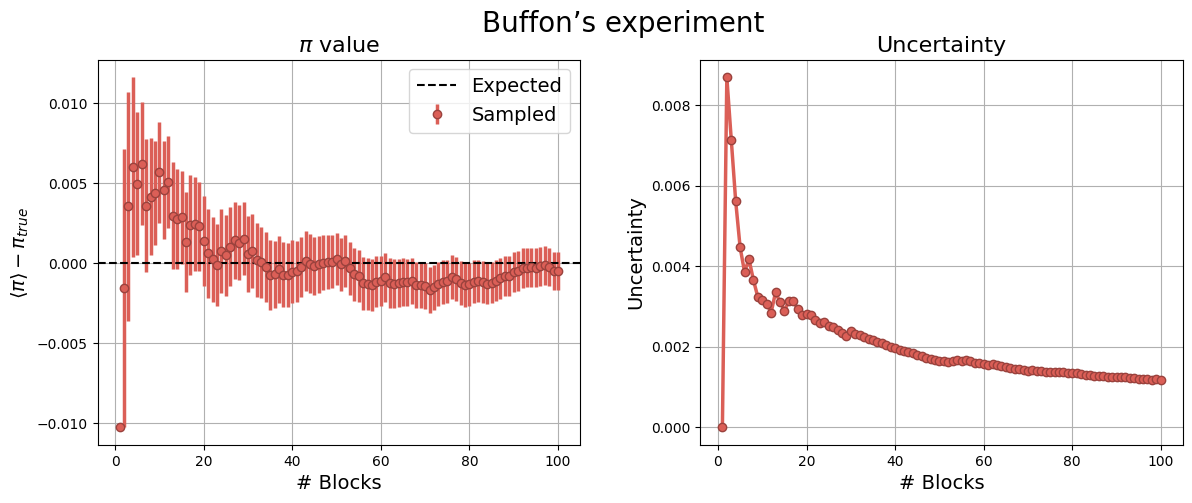

In [33]:
# Data import
df = pd.read_csv("../E01/e01_3/data.dat", delimiter=' ') 

fig, axs = plt.subplots(1, 2, figsize=(14, 5))   # Subplots
fig.suptitle("Buffon’s experiment", fontsize=title_size + 4)

# Plot pi value
axs[0].errorbar(df['#blocchi'], df['mean'] - math.pi, yerr = df['dev'], color = colors[0], fmt='o', mec=tuple(np.array(colors[0]) * 0.7), linewidth=2.5, label="Sampled")
axs[0].axhline(0, color='black', linestyle='--', label="Expected")      # Line at y = 0
axs[0].set_title(r'$\pi$ value', fontsize=title_size)
axs[0].set_xlabel(r'# Blocks', fontsize=axis_size)
axs[0].set_ylabel(r'$\left< \pi \right>-\pi_{true}$', fontsize=axis_size)
axs[0].tick_params(axis='both', which='major', labelsize=value_size)
axs[0].legend(fontsize=axis_size)
axs[0].grid(True)

# Plot dev std
axs[1].plot(df['#blocchi'], df['dev'], color=colors[0], label='Important sampling', linewidth=2.5, marker='o', mec=tuple(np.array(colors[0]) * 0.7))
axs[1].set_title("Uncertainty", fontsize=title_size)
axs[1].set_xlabel('# Blocks', fontsize=axis_size)
axs[1].set_ylabel('Uncertainty', fontsize=axis_size)
axs[1].tick_params(axis='both', which='major', labelsize=value_size)
axs[1].grid(True)

plt.subplots_adjust(wspace=0.25)
plt.show()
